<a href="https://colab.research.google.com/github/purnaa-l/MiniProject-ML-Models-All/blob/main/NLP/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"

import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax

In [2]:
path = '/kaggle/input'
print("Files in input directory:")
print(os.listdir(path))


Files in input directory:
[]


In [3]:
import csv
df = pd.read_csv('guardian_environment_news.csv', header=None)


In [4]:
# Print the first 5 rows of the DataFrame
print(df.head())
df.columns = ['Title', 'Intro Text', 'Authors', 'Article Text', 'Date Published']


                                                   0  \
0                                              Title   
1   Liz Truss ‘will approve more oil drilling if ...   
2  Renewed Highland golf course plan has environm...   
3   Visiting green spaces deters mental health dr...   
4  Bought too much red cabbage? Turn it into a fe...   

                                                   1  \
0                                         Intro Text   
1  Tory leadership candidate criticised by campai...   
2  Scottish government rejected a new links at Co...   
3  Positive effects were stronger among those rep...   
4  This fantastic vegan centrepiece makes full us...   

                                  2  \
0                           Authors   
1    ['Rob Davies', '@ByRobDavies']   
2  ['Ewan Murray', '@mrewanmurray']   
3  ['Damien Gayle', '@damiengayle']   
4                      ['Tom Hunt']   

                                                   3               4  
0                   

In [5]:
print(df.columns)


Index(['Title', 'Intro Text', 'Authors', 'Article Text', 'Date Published'], dtype='object')


In [6]:
!pip install tensorflow

In [9]:
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", framework="pt")

# Handle missing values and ensure all text is in string format
df['Intro Text'] = df['Intro Text'].fillna('No intro text').astype(str)

# Apply sentiment analysis to the intro text
df['sentiment'] = df['Intro Text'].apply(lambda x: sentiment_model(x[:512])[0]['label'])

# Map labels to simpler form
df['sentiment'] = df['sentiment'].map({'POSITIVE': 'positive', 'NEGATIVE': 'negative', 'NEUTRAL': 'neutral'})

# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution in Pollution-Related News")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


KeyboardInterrupt: 

In [19]:

# Load pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", framework="pt")

# Apply sentiment analysis to the intro text (or article_text for full content)

# Map labels to simpler form



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [20]:
df['Intro Text'] = df['Intro Text'].fillna('No intro text').astype(str)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


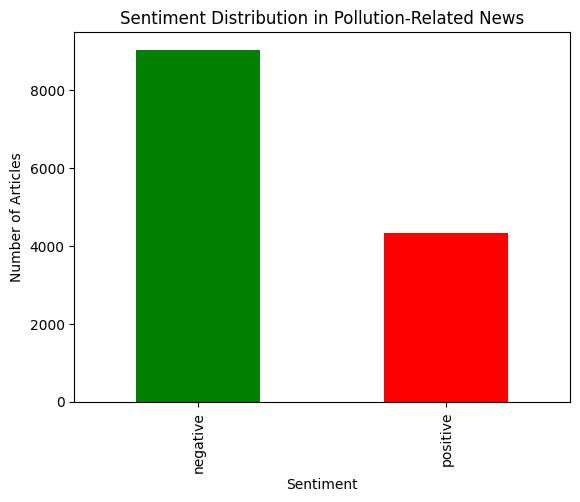

In [23]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Load the pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", framework="pt")

# Handle missing values and ensure all text is in string format
df['Intro Text'] = df['Intro Text'].fillna('No intro text').astype(str)

# Batch process the texts instead of applying the model one by one
batch_size = 16  # You can adjust this depending on your available memory

# Initialize an empty list for results
results = []

# Process the texts in batches
for i in range(0, len(df), batch_size):
    batch = df['Intro Text'][i:i + batch_size].tolist()  # Get a batch of texts
    batch_results = sentiment_model(batch)  # Get sentiment results for the batch
    results.extend(batch_results)  # Add the results to the list

# Check if the number of results matches the number of rows in the dataframe
assert len(results) == len(df), f"Mismatch: {len(results)} results, but dataframe has {len(df)} rows"

# Add the sentiment results to the dataframe
df['sentiment'] = [result['label'] for result in results]

# Map labels to simpler form
df['sentiment'] = df['sentiment'].map({'POSITIVE': 'positive', 'NEGATIVE': 'negative', 'NEUTRAL': 'neutral'})

# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution in Pollution-Related News")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()


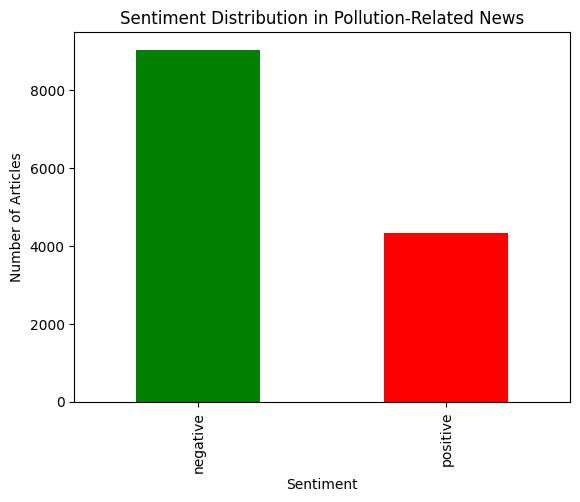

In [24]:
# Visualize sentiment distribution
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution in Pollution-Related News")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.show()

In [26]:
df.head()

,Title,Intro Text,Authors,Article Text,Date Published,sentiment
7,Scaly stowaway: lizard makes an appearance at...,Gardeners at the Yeo Valley Organic display we...,['Helena Horton'],Visitors to Chelsea flower show come from all ...,2019-12-01,positive
9,UK energy industry urges ministers to stick w...,Some rightwingers claim renewables have increa...,"['Fiona Harvey', ' Environment correspondent']",Energy companies want the government to implem...,2022-01-20,negative
11,Shell chief vows to bolster emissions strateg...,Ben van Beurden pledges to ‘rise to challenge...,['Joanna Partridge'],Royal Dutch Shell has vowed to accelerate its ...,NaN,negative
13,"Monday briefing: The dramatic, agonising, cruc...","In today’s newsletter: For the next two weeks,...",['Archie Bland'],"Good morning. Last year, the Cop26 climate sum...",2022-11-07,negative
15,"Here in British Columbia, we have spent the s...",Blazes are destroying whole communities. The C...,NaN,Small fires crackle into life on the hills aro...,2021-08-31,negative


In [28]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(df).toarray()
y=df.iloc[:, -1].values


print(len(X[0]))

8


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
df_nb = df.copy()
df_nb = df_nb[df_nb['sentiment'].isin(['positive', 'negative'])]  # Remove possible NaNs or others
vectorizer = CountVectorizer(max_features=1500)
X = vectorizer.fit_transform(df_nb['Intro Text'].astype(str)).toarray()
y = df_nb['sentiment'].map({'positive': 1, 'negative': 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)





In [36]:
print(acc)
print(cm)

0.6535727646838758
[[1145  660]
 [ 266  602]]
